In [2]:
%load_ext autoreload
%autoreload 2
from analysis_lib import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Reanalysis of Runtimes with no Cache

In [3]:
df_single = pd.read_csv("./variable_k/runtimes/runtimes_single_bin.tsv", sep="\t", header=None)
df_k3 = pd.read_csv("./variable_k/runtimes_no_cache/runtimes_no_cache_k3.tsv", sep="\t", header=None)
df_k4 = pd.read_csv("./variable_k/runtimes_no_cache/runtimes_no_cache_k4.tsv", sep="\t", header=None)
df_k5 = pd.read_csv("./variable_k/runtimes_no_cache/runtimes_no_cache_k5.tsv", sep="\t", header=None)
df_k6 = pd.read_csv("./variable_k/runtimes_no_cache/runtimes_no_cache_k6.tsv", sep="\t", header=None)

In [4]:
dfs = [df_k3, df_k4, df_k5,df_k6]
for df in dfs:
    df.columns = ["Preprocessing","Construction","Traversal","Scanning","Complexity","Index Queries"]

In [5]:
df_single.columns = ["tmp"]
df_single["Preprocessing"] = 0
df_single["Construction"] = 0
df_single["Traversal"] = 0
df_single["Scanning"] = df_single["tmp"]
df_single["Complexity"] = 0
df_single["Index Queries"] = 0
df_single = df_single.drop(columns=["tmp"], axis=1)

In [6]:
runtime_df = pd.DataFrame([df_single.mean(),df_k3.mean(),df_k4.mean(),df_k5.mean(),df_k6.mean()])

In [7]:
runtime_df["ksize"] = pd.Series(["No Index", 3,4,5,6])

Text(0, 0.5, 'Runtime (s)')

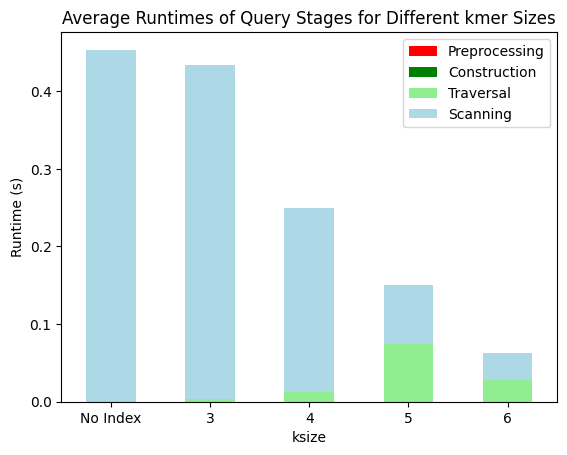

In [8]:
colors = ['red','green', 'lightgreen', 'lightblue']
plt = runtime_df.plot(kind='bar', stacked=True, x="ksize", y=["Preprocessing","Construction","Traversal","Scanning"], rot=0, color=colors, title="Average Runtimes of Query Stages for Different kmer Sizes")
plt.set_ylabel("Runtime (s)")